In [8]:
import pandas as pd 
import numpy as np 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import seaborn as sns

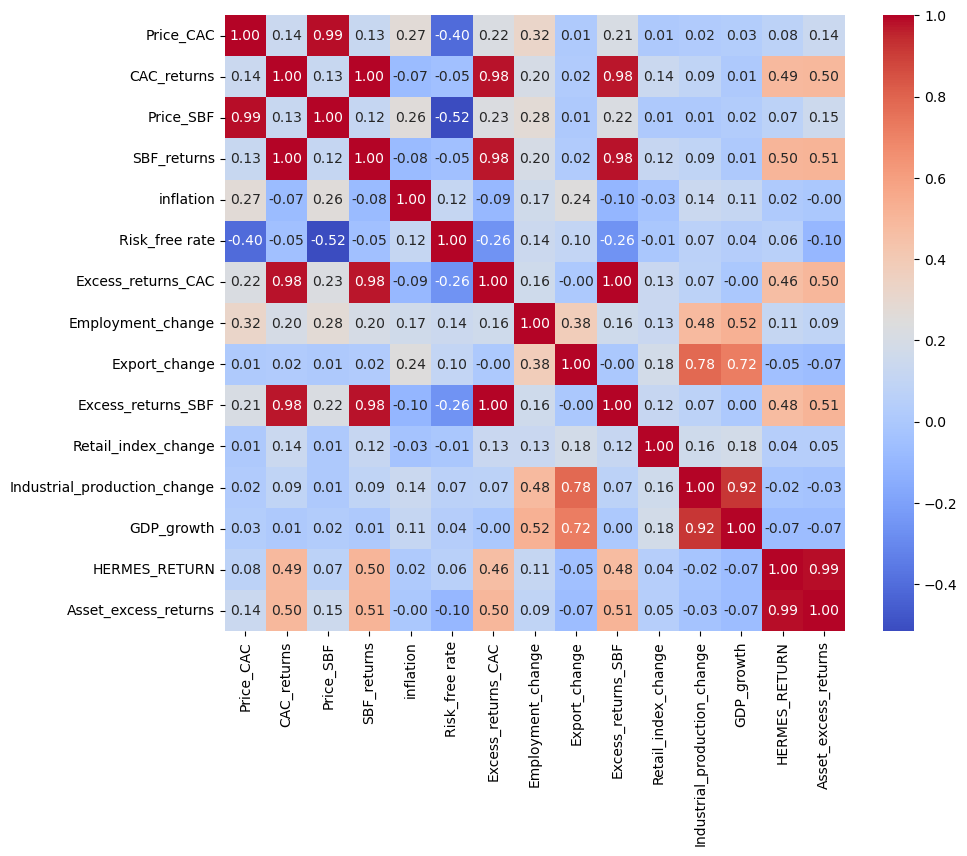

In [10]:
df = pd.read_excel('Asserpricingassignment.xlsx')
df.set_index(['Date'])
df['Asset_excess_returns'] = df['HERMES_RETURN'] - df['Risk_free rate']
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.show()

In [27]:
df

,Date,Price_CAC,CAC_returns,Price_SBF,SBF_returns,inflation,Risk_free rate,Excess_returns_CAC,Employment_change,Export_change,Excess_returns_SBF,Retail_index_change,Industrial_production_change,GDP_growth,HERMES_RETURN,Asset_excess_returns
0,2023-06-30,7400.06,1.06,5633.376882,0.854619,1.033204,3.448,-2.388,0.057738,3.906902,-2.593381,-1.753296,0.949210,0.525721,6.759657,3.311657
1,2023-03-31,7322.39,13.11,5585.640960,12.312875,1.802721,2.826,10.284,0.447281,3.671654,9.486875,-11.076222,0.166988,0.019354,28.996540,26.170540
2,2022-12-30,6473.76,12.35,4973.286402,12.135002,0.997413,1.778,10.572,0.238711,0.648039,10.357002,19.268675,-0.461341,0.110884,18.734593,16.956593
3,2022-09-30,5762.34,-2.71,4435.088334,-3.174194,1.167253,0.737,-3.447,0.502802,0.344494,-3.911194,-1.498330,0.501151,0.314968,14.058107,13.321107
4,2022-06-30,5922.86,-11.07,4580.481727,-11.278569,2.084548,-0.386,-10.684,0.570687,-2.032472,-10.892569,-0.690963,-0.535763,0.379079,-17.382888,-16.996888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1994-09-30,1879.25,-0.67,1301.680000,-0.997117,0.423881,5.620,-6.290,0.703416,8.027577,-6.617117,-3.362939,1.508560,0.883772,17.843858,12.223858
116,1994-06-30,1892.00,-9.12,1314.790000,-9.811844,0.532667,5.610,-14.730,0.456627,9.712963,-15.421844,5.827619,2.764513,1.003399,-5.614036,-11.224036
117,1994-03-31,2081.94,-8.21,1457.830000,-7.371732,0.177872,6.170,-14.380,0.233321,-0.506030,-13.541732,-16.733900,0.800592,0.708383,21.276604,15.106604
118,1993-12-31,2268.22,7.26,1573.850000,9.012010,0.464619,6.170,1.090,-0.034511,-1.556104,2.842010,19.233337,-0.119183,0.335498,18.120127,11.950127


<Figure size 1200x600 with 0 Axes>

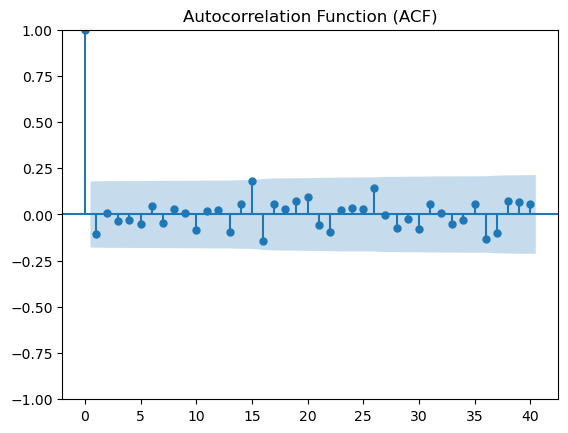

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

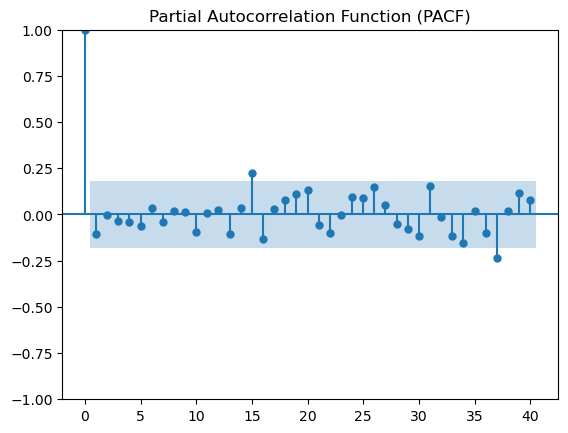

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plot_acf(df['Asset_excess_returns'], lags=40)  # Replace 'Your_Column' with the column name of your time series data
plt.title('Autocorrelation Function (ACF)')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(df['Asset_excess_returns'], lags=40)  # Replace 'Your_Column' with the column name of your time series data
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [14]:
model = smf.ols(formula = 'Asset_excess_returns ~ Excess_returns_CAC+ GDP_growth+ Employment_change + Export_change + Industrial_production_change + Retail_index_change', data = df)
fi = model.fit()
R2 = fi.rsquared_adj
print(R2)
fi.summary()

0.2197161893944206


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Asset_excess_returns   R-squared:                       0.259
Model:                              OLS   Adj. R-squared:                  0.220
Method:                   Least Squares   F-statistic:                     6.585
Date:                  Sun, 17 Sep 2023   Prob (F-statistic):           5.48e-06
Time:                          18:11:02   Log-Likelihood:                -470.76
No. Observations:                   120   AIC:                             955.5
Df Residuals:                       113   BIC:                             975.0
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.8580      1.402      2.752      0.007       1.081       6.635
Excess_returns_CAC               0.6628      0.115      5.767      0.000       0.435       0.890
GDP_growth                      -0.4700      1.469     -0.320      0.750      -3.380       2.440
Employment_change                2.0579      3.055      0.674      0.502      -3.995       8.111
Export_change                   -0.0675      0.312     -0.216      0.829      -0.685       0.550
Industrial_production_change    -0.0707      1.222     -0.058      0.954      -2.491       2.350
Retail_index_change             -0.0112      0.103     -0.108      0.914      -0.215       0.193
==============================================================================
Omnibus:                       15.772   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.171
Skew:                           0.806   Prob(JB):                     0.000113
Kurtosis:                       4.019   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df.columns


Index(['Date', 'Price_CAC', 'CAC_returns', 'Price_SBF', 'SBF_returns',
       'inflation', 'Risk_free rate', 'Excess_returns_CAC',
       'Employment_change', 'Export_change', 'Excess_returns_SBF',
       'Retail_index_change', 'Industrial_production_change', 'GDP_growth',
       'HERMES_RETURN', 'Asset_excess_returns'],
      dtype='object')

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

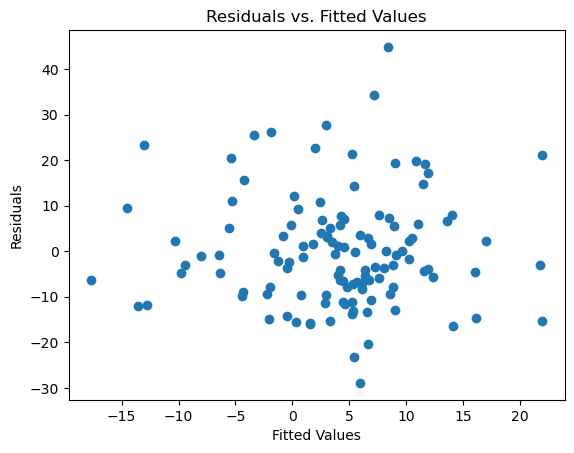

In [15]:
residuals = fi.resid

# Create residual plots


# Scatterplot of residuals vs. predicted values
plt.scatter(fi.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

(array([ 2.,  5.,  5., 10., 18., 33., 28., 12.,  5.,  2.]),
 array([-31.97 , -26.103, -20.236, -14.369,  -8.502,  -2.635,   3.232,
          9.099,  14.966,  20.833,  26.7  ]),
 <BarContainer object of 10 artists>)

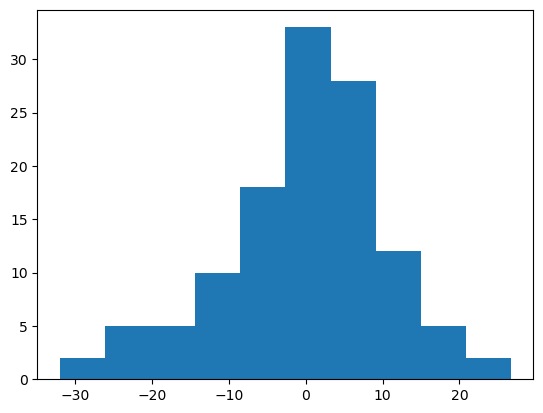

In [17]:
plt.hist(df['Excess_returns_CAC'])

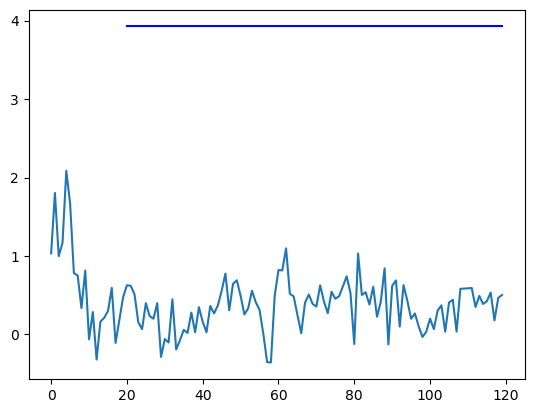

In [26]:
#ARIMA WITH EXOG VARIABLES 
from statsmodels.tsa.arima.model import ARIMA
exog_data = df[['Excess_returns_CAC']
model = ARIMA (df.Asset_excess_returns, order=(15,0,0), exog= )
results= model.fit()
results.summary()

one_step = results.get_prediction(start=-100, dynamic=True)
mean = one_step.predicted_mean
confidence_intervals = one_step.conf_int()
lower_limits = confidence_intervals.loc[:,'lower Asset_excess_returns']
upper_limits = confidence_intervals.loc[:,'upper Asset_excess_returns']
plt.plot(df.inflation.index, df.inflation, label='observed')
plt.plot(mean.index,mean, color='b')

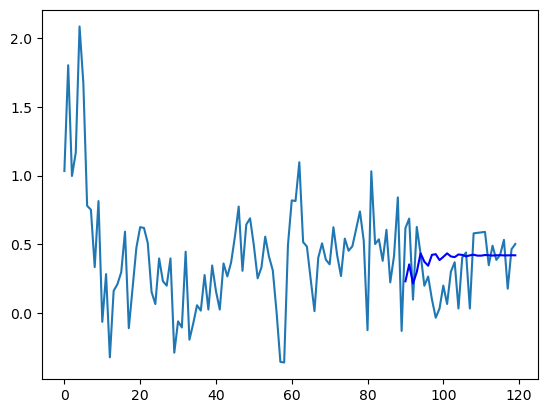

In [156]:
plt.plot(df.inflation.index, df.inflation, label='observed')
plt.plot(mean.index,mean, color='b')

In [113]:
m = df.Excess_returns_CAC.mean()
std = df.Excess_returns_CAC.std()
print(m,std)

-0.2475408333333337 10.592038475325346


In [116]:
import arch

model = arch.arch_model(df.Excess_returns_CAC,
p=1,q=1, mean='constant', vol='GARCH',dist='skewt')
mdlreslt = model.fit(update_freq=4)
print(mdlreslt.summary())
frcst = mdlreslt.forecast(horizon=5)
print(frcst.variance[-1:])
stdresid = mdlreslt.resid/mdlreslt.conditional_volatility

Iteration:      4,   Func. Count:     33,   Neg. LLF: 449.86018417249784
Iteration:      8,   Func. Count:     62,   Neg. LLF: 448.73764096902164
Iteration:     12,   Func. Count:     90,   Neg. LLF: 448.2035896977448
Iteration:     16,   Func. Count:    118,   Neg. LLF: 448.18268815037476
Iteration:     20,   Func. Count:    146,   Neg. LLF: 448.1659939818775
Iteration:     24,   Func. Count:    173,   Neg. LLF: 448.16423409772506
Optimization terminated successfully    (Exit mode 0)
            Current function value: 448.1642340977247
            Iterations: 24
            Function evaluations: 173
            Gradient evaluations: 24
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                Excess_returns_CAC   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -44

C:\Users\zgcha\AppData\Roaming\Python\Python39\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


(array([ 3.,  3.,  7., 13., 19., 38., 19., 11.,  5.,  2.]),
 array([-2.92704562, -2.37396381, -1.820882  , -1.26780019, -0.71471838,
        -0.16163657,  0.39144524,  0.94452705,  1.49760886,  2.05069067,
         2.60377248]),
 <BarContainer object of 10 artists>)

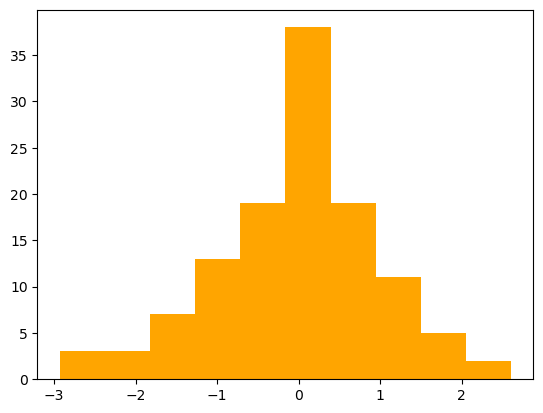

In [117]:
plt.hist(stdresid, facecolor='orange')

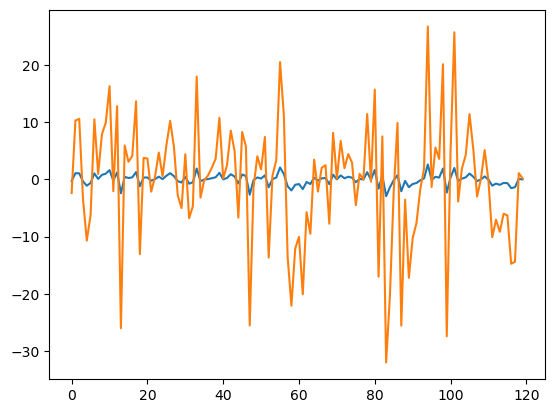

In [124]:
plt.plot(stdresid)
plt.plot(df.Excess_returns_CAC)
plt.show()

In [196]:
df.columns

Index(['Date', 'Price_CAC', 'CAC_returns', 'Price_SBF', 'SBF_returns',
       'inflation', 'Risk_free rate', 'Excess_returns_CAC',
       'Employment_change', 'Export_change', 'Excess_returns_SBF',
       'Retail_index_change', 'Industrial_production_change', 'GDP_growth'],
      dtype='object')

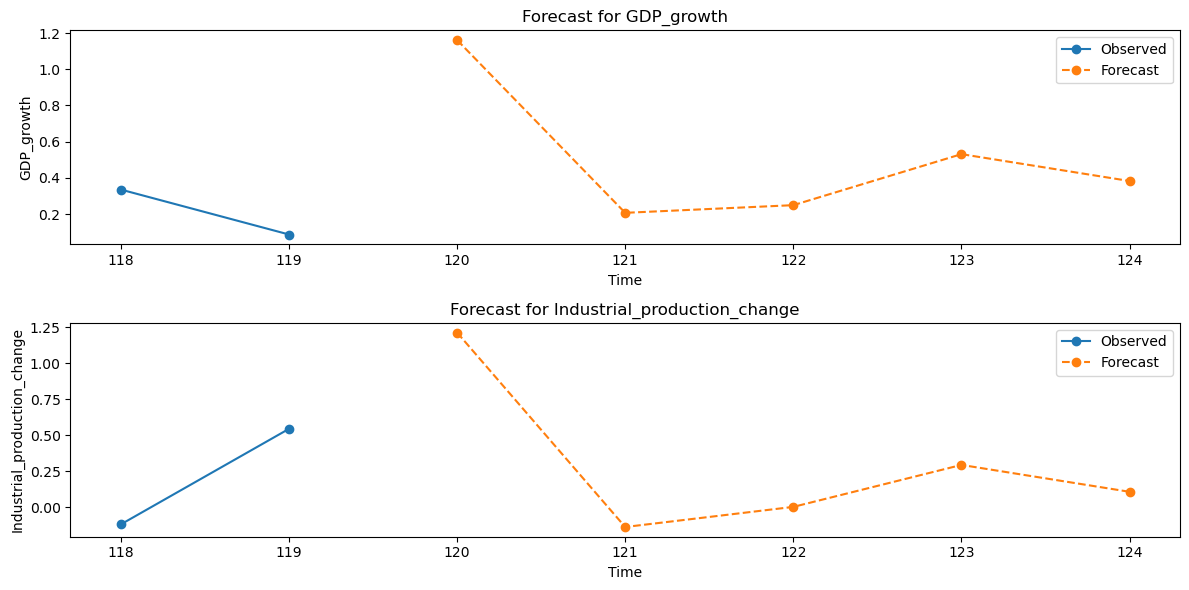

In [216]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load your multivariate time series data into a DataFrame (replace 'your_data.csv' with your data file)

# Select the columns you want to include in the VAR model
ndf = df[['GDP_growth', 'Industrial_production_change']]

# Define the lag order (e.g., lag_order=2 for VAR(2))
lag_order = 2

# Define the forecast horizon
forecast_horizon = 5

# Create a VAR model
model = VAR(ndf)

# Fit the VAR model
model_fitted = model.fit(lag_order)

# Forecast future values
forecasted_values = model_fitted.forecast(ndf.values[-lag_order:], steps=forecast_horizon)

# Plot the forecasts for each variable
plt.figure(figsize=(12, 6))
for i, col in enumerate(ndf.columns):
    plt.subplot(2, 1, i+1)
    plt.plot(ndf.index[-lag_order:], ndf[col].values[-lag_order:], label='Observed', marker='o')
    plt.plot(range(len(ndf), len(ndf) + forecast_horizon), forecasted_values[:, i], label='Forecast', linestyle='--', marker='o')
    plt.title(f'Forecast for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
plt.tight_layout()
plt.show()


In [312]:
import pandas as pd
import statsmodels.api as sm

# Load your data into a DataFrame (replace 'Asserpricingassignment.xlsx' with your data file)
dfh = pd.read_excel('Asserpricingassignment.xlsx', parse_dates=True, index_col='Date')

# Compute the excess returns (Asset Returns - Risk-free Rate)
dfh['Excess_returns_HERMES'] = dfh['HERMES_RETURN'] - dfh['Risk_free rate']

# Define the risk factors
factor1 = dfh['inflation']
factor2 = dfh['GDP_growth']
factor3 = dfh['Industrial_production_change']
factor4 = dfh['Retail_index_change']
rf= dfh['Risk_free rate']
# Add a constant to the risk factors for the intercept
risk_factors = sm.add_constant([factor1, factor2, factor3, factor4]).T

# Extract the data for the regression
dfh


,Price_CAC,CAC_returns,Price_SBF,SBF_returns,inflation,Risk_free rate,Excess_returns_CAC,Employment_change,Export_change,Excess_returns_SBF,Retail_index_change,Industrial_production_change,GDP_growth,HERMES_RETURN,Excess_returns_HERMES
Date,,,,,,,,,,,,,,,
2023-06-30,7400.06,1.06,5633.376882,0.854619,1.033204,3.448,-2.388,0.057738,3.906902,-2.593381,-1.753296,0.949210,0.525721,6.759657,3.311657
2023-03-31,7322.39,13.11,5585.640960,12.312875,1.802721,2.826,10.284,0.447281,3.671654,9.486875,-11.076222,0.166988,0.019354,28.996540,26.170540
2022-12-30,6473.76,12.35,4973.286402,12.135002,0.997413,1.778,10.572,0.238711,0.648039,10.357002,19.268675,-0.461341,0.110884,18.734593,16.956593
2022-09-30,5762.34,-2.71,4435.088334,-3.174194,1.167253,0.737,-3.447,0.502802,0.344494,-3.911194,-1.498330,0.501151,0.314968,14.058107,13.321107
2022-06-30,5922.86,-11.07,4580.481727,-11.278569,2.084548,-0.386,-10.684,0.570687,-2.032472,-10.892569,-0.690963,-0.535763,0.379079,-17.382888,-16.996888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-09-30,1879.25,-0.67,1301.680000,-0.997117,0.423881,5.620,-6.290,0.703416,8.027577,-6.617117,-3.362939,1.508560,0.883772,17.843858,12.223858
1994-06-30,1892.00,-9.12,1314.790000,-9.811844,0.532667,5.610,-14.730,0.456627,9.712963,-15.421844,5.827619,2.764513,1.003399,-5.614036,-11.224036
1994-03-31,2081.94,-8.21,1457.830000,-7.371732,0.177872,6.170,-14.380,0.233321,-0.506030,-13.541732,-16.733900,0.800592,0.708383,21.276604,15.106604


In [314]:
risk_factors = sm.add_constant([factor1, factor2, factor3, factor4]).T

# Extract the data for the regression
data = pd.concat([dfh['HERMES_RETURN'], dfh['Excess_returns_CAC'],rf,factor1, factor2, factor3, factor4], axis=1).dropna()

# Set the index to 'Date'

# Extract the dependent variable (excess returns) and risk factors
asset_returns = data['HERMES_RETURN']
risk_factors = sm.add_constant(data[[ 'Excess_returns_CAC','Risk_free rate' ]])

# Fit a linear regression model
m = sm.OLS(asset_returns, risk_factors, hasconst=bool).fit()
m.summary()






<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HERMES_RETURN   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     19.18
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           6.25e-08
Time:                        20:54:02   Log-Likelihood:                -471.36
No. Observations:                 120   AIC:                             948.7
Df Residuals:                     117   BIC:                             957.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.6766      1.522      2.415      0.017       0.662       6.691
Excess_returns_CAC     0.6860      0.112      6.153      0.000       0.465       0.907
Risk_free rate         1.2214      0.538      2.270      0.025       0.156       2.287
==============================================================================
Omnibus:                       14.013   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.531
Skew:                           0.752   Prob(JB):                     0.000424
Kurtosis:                       3.918   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate some random data for demonstration purposes
np.random.seed(0)
n_obs = 1000000
n_factors = 3

# Generate returns for an asset
asset_returns = np.random.randn(n_obs)

# Generate factor data (e.g., market, interest rate, and inflation)
market_returns = np.random.randn(n_obs)
interest_rate = np.random.randn(n_obs)
inflation = np.random.randn(n_obs)

# Create a DataFrame to hold the data
data = pd.DataFrame({'Asset_Returns': asset_returns, 'Market_Returns': market_returns, 'Interest_Rate': interest_rate, 'Inflation': inflation})

# Perform the regression analysis
X = data[['Market_Returns', 'Interest_Rate', 'Inflation']]
X = sm.add_constant(X)  # Add a constant term (intercept)
y = data['Asset_Returns']

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Asset_Returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3896
Date:                Sat, 16 Sep 2023   Prob (F-statistic):              0.760
Time:                        21:03:55   Log-Likelihood:            -1.4189e+06
No. Observations:             1000000   AIC:                         2.838e+06
Df Residuals:                  999996   BIC:                         2.838e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0015      0.001      1.

In [316]:
market_returns

array([ 1.8831507 , -1.34775906, -1.270485  ,  0.96939671, -1.17312341,
        1.94362119, -0.41361898, -0.74745481,  1.92294203,  1.48051479,
        1.86755896,  0.90604466, -0.86122569,  1.91006495, -0.26800337,
        0.8024564 ,  0.94725197, -0.15501009,  0.61407937,  0.92220667,
        0.37642553, -1.09940079,  0.29823817,  1.3263859 , -0.69456786,
       -0.14963454, -0.43515355,  1.84926373,  0.67229476,  0.40746184,
       -0.76991607,  0.53924919, -0.67433266,  0.03183056, -0.63584608,
        0.67643329,  0.57659082, -0.20829876,  0.39600671, -1.09306151,
       -1.49125759,  0.4393917 ,  0.1666735 ,  0.63503144,  2.38314477,
        0.94447949, -0.91282223,  1.11701629, -1.31590741, -0.4615846 ,
       -0.06824161,  1.71334272, -0.74475482, -0.82643854, -0.09845252,
       -0.66347829,  1.12663592, -1.07993151, -1.14746865, -0.43782004,
       -0.49803245,  1.92953205,  0.94942081,  0.08755124, -1.22543552,
        0.84436298, -1.00021535, -1.5447711 ,  1.18802979,  0.31

In [ ]:
ValueError: zero-size array to reduction operation maximum which has no identity


In [302]:
risk_factors

,inflation,GDP_growth,Industrial_production_change,Retail_index_change
0,0.402243,0.40032,0.152738,0.971866
1,0.402243,0.40032,0.152738,0.971866
2,0.402243,0.40032,0.152738,0.971866
3,0.402243,0.40032,0.152738,0.971866
4,0.402243,0.40032,0.152738,0.971866
...,...,...,...,...
115,0.402243,0.40032,0.152738,0.971866
116,0.402243,0.40032,0.152738,0.971866
117,0.402243,0.40032,0.152738,0.971866
118,0.402243,0.40032,0.152738,0.971866


In [278]:
import pandas as pd
import statsmodels.regression.linear_model as lm
import statsmodels.tools.tools as ct